In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

#Upload dataset
from google.colab import files
uploaded = files.upload()

#read dataset
df_encoded = pd.read_csv('depression_data_encoded.csv')

Saving depression_data_encoded.csv to depression_data_encoded (1).csv


BEFORE scaling statistics:
                 Age  Number of Children         Income
count  408611.000000       408611.000000  408611.000000
mean       48.956036            1.295929   48967.606699
std        18.192314            1.236509   37924.576364
min        18.000000            0.000000       0.410000
25%        33.000000            0.000000   20742.770000
50%        49.000000            1.000000   37011.400000
75%        65.000000            2.000000   74032.860000
max        80.000000            4.000000  160022.000000

AFTER scaling statistics:
                Age  Number of Children        Income
count  4.086110e+05        4.086110e+05  4.086110e+05
mean   1.704231e-16        1.006445e-16 -2.811489e-16
std    1.000001e+00        1.000001e+00  1.000001e+00
min   -1.701602e+00       -1.048056e+00 -1.291175e+00
25%   -8.770768e-01       -1.048056e+00 -7.442370e-01
50%    2.416604e-03       -2.393268e-01 -3.152631e-01
75%    8.819100e-01        5.694026e-01  6.609246e-01
max    1.7

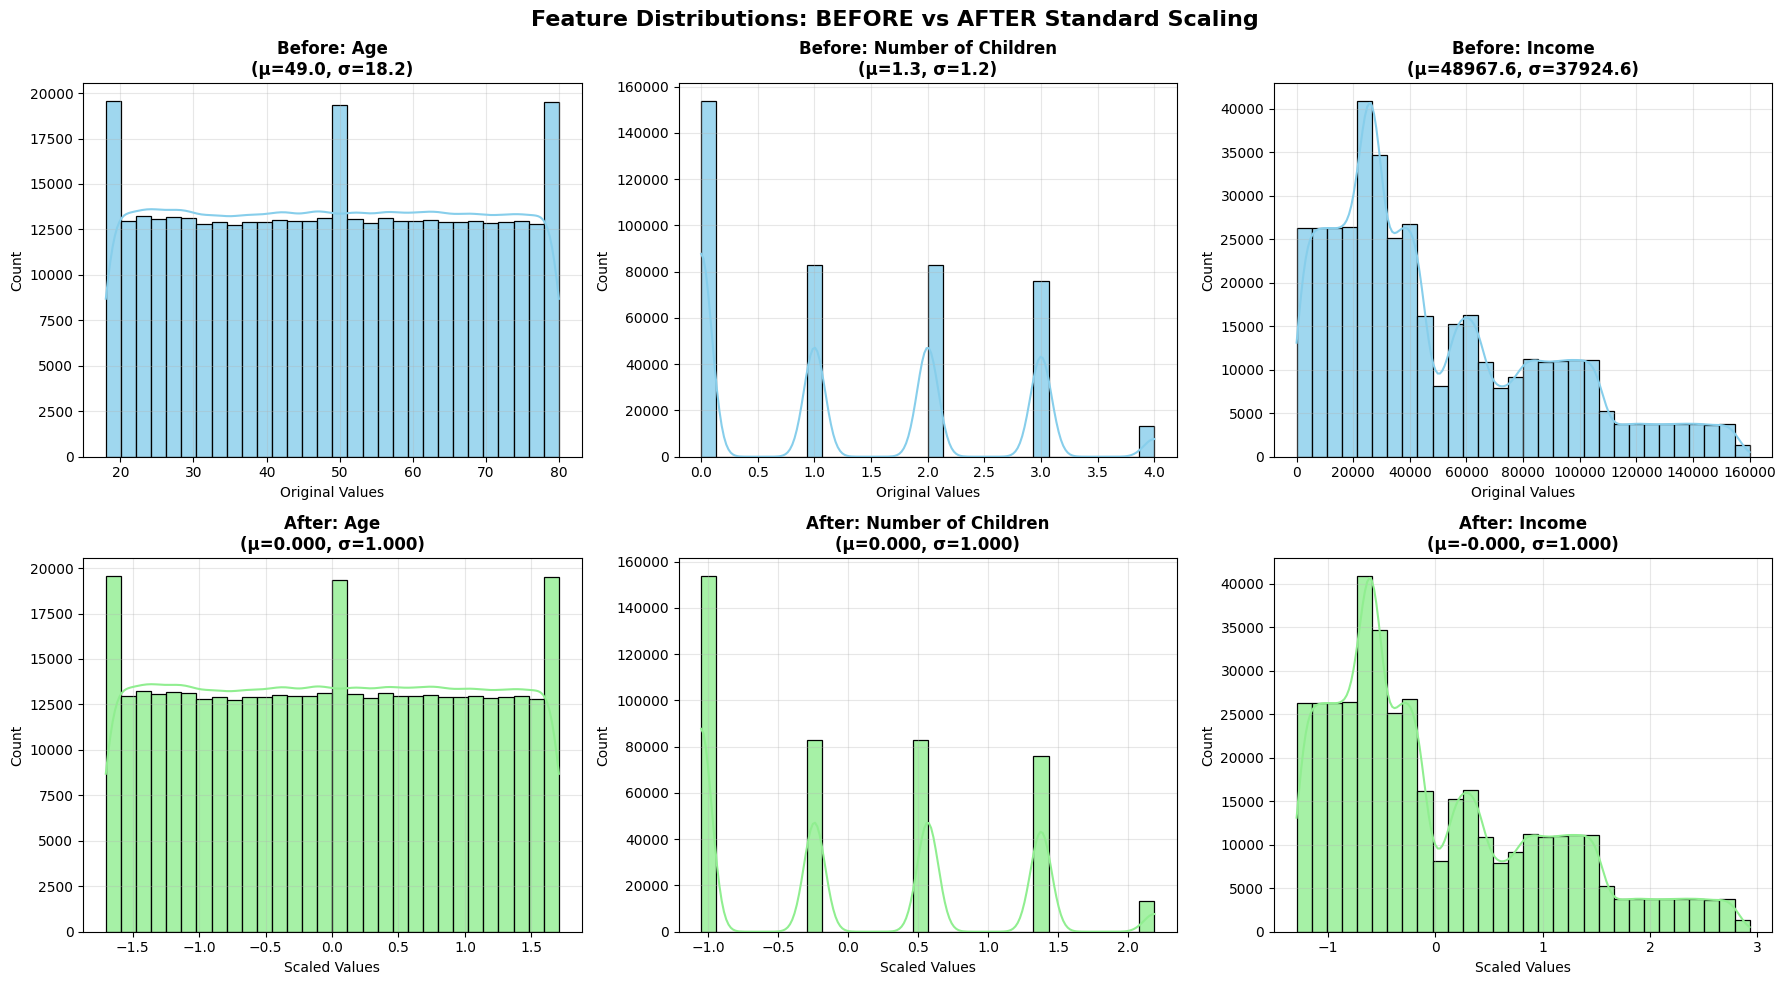

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Define continuous columns to scale
continuous_cols = ['Age', 'Number of Children', 'Income']

# Create a fresh copy and apply scaling CORRECTLY
df_scaled = df_encoded.copy()

# Scale each continuous column individually to ensure it works
for col in continuous_cols:
    scaler = StandardScaler()
    # Reshape to 2D array as required by sklearn
    df_scaled[col] = scaler.fit_transform(df_encoded[col].values.reshape(-1, 1)).flatten()

# Verify scaling actually worked
print("BEFORE scaling statistics:")
print(df_encoded[continuous_cols].describe())
print("\nAFTER scaling statistics:")
print(df_scaled[continuous_cols].describe())

# Create the comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Before Scaling - Distributions
for i, col in enumerate(continuous_cols):
    sns.histplot(df_encoded[col], kde=True, ax=axes[0, i], color='skyblue', alpha=0.8, bins=30)
    axes[0, i].set_title(f'Before: {col}\n(μ={df_encoded[col].mean():.1f}, σ={df_encoded[col].std():.1f})', fontweight='bold')
    axes[0, i].set_xlabel('Original Values')
    axes[0, i].grid(True, alpha=0.3)

# After Scaling - Distributions
for i, col in enumerate(continuous_cols):
    sns.histplot(df_scaled[col], kde=True, ax=axes[1, i], color='lightgreen', alpha=0.8, bins=30)
    axes[1, i].set_title(f'After: {col}\n(μ={df_scaled[col].mean():.3f}, σ={df_scaled[col].std():.3f})', fontweight='bold')
    axes[1, i].set_xlabel('Scaled Values')
    axes[1, i].grid(True, alpha=0.3)

plt.suptitle('Feature Distributions: BEFORE vs AFTER Standard Scaling', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Save Final Scaled Dataset
df_scaled.to_csv("depression_data_scaled.csv", index=False)

files.download('depression_data_scaled.csv')